<a href="https://colab.research.google.com/github/JaminUbuntu/NLP-Coursework-Benjamin/blob/main/NLP_Coursework_Benjamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import contractions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from scipy.sparse import hstack # Import hstack function from scipy.sparse

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Load the dataset, remove headers as part of the data and create a header

In [3]:
# Load dataset
file_path = "/content/SemEval2017-task4-dev.subtask-A.english.INPUT.txt"
df = pd.read_csv(file_path, sep="\t", header=None, names=["User_ID", "Sentiment", "Text", "Labels"])
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,User_ID,Sentiment,Text,Labels
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,NaN
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
3,619974445185302528,neutral,If you could ask an onstage interview question...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
...,...,...,...,...
20627,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN
20629,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,NaN
20630,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...,NaN


Performing Text EDA

In [4]:
print(df.sample(3))  # Randomly select 3 entries to inspect

                 User_ID Sentiment  \
6089  632983825228808192   neutral   
6562  633654158940237824   neutral   
3461  628155552124792832  positive   

                                                   Text Labels  
6089  And to think I wrote this Dustin Johnson Tweet...    NaN  
6562  Isaiah Thomas tweeted that he worked out with ...    NaN  
3461  I just finished reading Paper Towns! I can't w...    NaN  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_ID    20632 non-null  int64 
 1   Sentiment  20632 non-null  object
 2   Text       20632 non-null  object
 3   Labels     10 non-null     object
dtypes: int64(1), object(3)
memory usage: 644.9+ KB


Performing Text Length Distribution

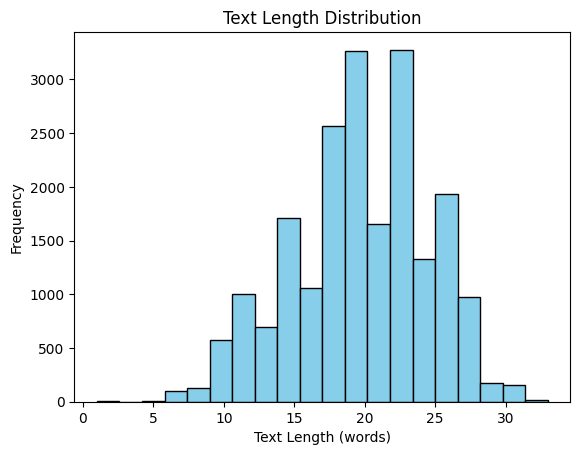

In [6]:
# Visualizing text length distribution
df['text_length'] = df['Text'].apply(lambda x: len(x.split()))
plt.hist(df['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

In [7]:
# Tokenize and count word frequencies
all_words = ' '.join(df['Text']).lower()
words = re.findall(r'\w+', all_words)
word_counts = Counter(words)

# Plot the most common words
word_counts.most_common(10)

[('the', 17023),
 ('to', 9105),
 ('t', 8569),
 ('i', 7583),
 ('co', 6406),
 ('in', 6186),
 ('a', 6152),
 ('and', 5979),
 ('on', 5513),
 ('of', 5115)]

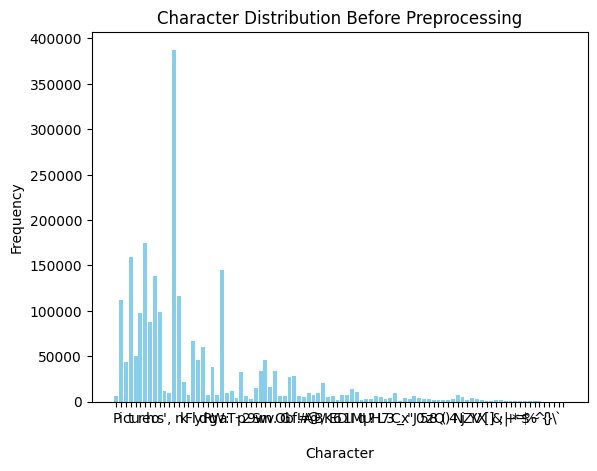

In [8]:
from collections import Counter
char_counts = Counter(''.join(df['Text']))
char_freq = dict(char_counts)
plt.bar(char_freq.keys(), char_freq.values(), color='skyblue')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Character Distribution Before Preprocessing')
plt.show()

Visualizing Word Cloud

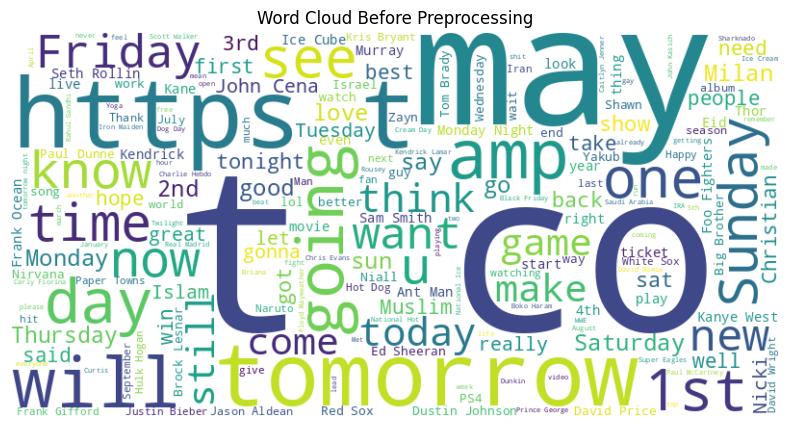

In [9]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

Visualizing Class Distribution

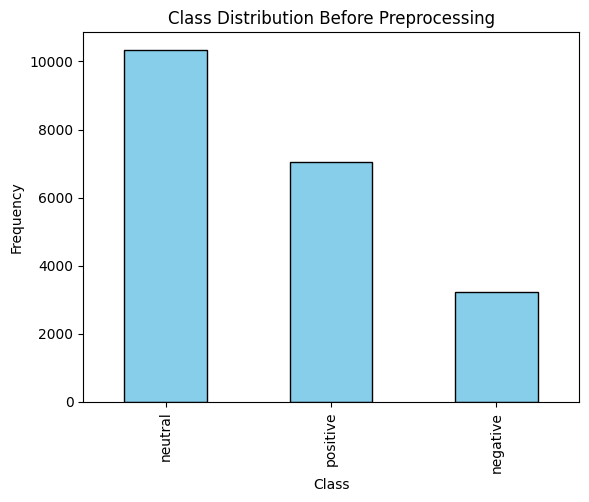

In [10]:
# Example for visualizing class distribution (for labeled data)
df['Sentiment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution Before Preprocessing')
plt.show()

In [11]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,10342
positive,7059
negative,3231


Remove the User_ID column since it will not help the prediction

In [12]:
df.drop(columns=["User_ID"], inplace=True)
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Sentiment,Text,Labels,text_length
0,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN,23
1,neutral,Order Go Set a Watchman in store or through ou...,NaN,21
2,negative,If these runway renovations at the airport pre...,NaN,22
3,neutral,If you could ask an onstage interview question...,NaN,16
4,positive,A portion of book sales from our Harper Lee/Go...,NaN,26
...,...,...,...,...
20627,neutral,@ShaquilleHoNeal from what I think you're aski...,NaN,20
20628,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN,10
20629,neutral,Hours before he arrived in Saudi Arabia on Tue...,NaN,19
20630,negative,@VanityFair Alex Kim Kardashian worth how to ...,NaN,16


In [13]:
df.drop(columns=["text_length"], inplace=True)
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Sentiment,Text,Labels
0,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN
1,neutral,Order Go Set a Watchman in store or through ou...,NaN
2,negative,If these runway renovations at the airport pre...,NaN
3,neutral,If you could ask an onstage interview question...,NaN
4,positive,A portion of book sales from our Harper Lee/Go...,NaN
...,...,...,...
20627,neutral,@ShaquilleHoNeal from what I think you're aski...,NaN
20628,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN
20629,neutral,Hours before he arrived in Saudi Arabia on Tue...,NaN
20630,negative,@VanityFair Alex Kim Kardashian worth how to ...,NaN


Check the Dataset Structure

In [14]:
df.describe()

,Sentiment,Text,Labels
count,20632,20632,10
unique,3,20552,10
top,neutral,Tomorrow Seth Rollins's WWE title reign will s...,Wed Jul 29 12:01:22 +0000 2015
freq,10342,2,1


View the unique values in the Labels column

In [15]:
labels = df['Labels'].unique()
labels

array([nan, 'Wed Jul 29 12:01:22 +0000 2015',
       'Fri Aug 07 11:54:09 +0000 2015', 'Mon Aug 24 20:27:40 +0000 2015',
       'Tue Aug 25 09:48:27 +0000 2015', 'Sun Aug 30 06:49:19 +0000 2015',
       'Tue Sep 01 08:09:47 +0000 2015', 'Wed Sep 09 00:20:13 +0000 2015',
       'Sat Nov 14 18:45:37 +0000 2015', 'Tue Nov 17 14:16:54 +0000 2015',
       'Mon Dec 28 14:27:59 +0000 2015'], dtype=object)

Drop Label column since is contains timestamps and we dont need that

In [16]:
df = df.drop(columns=['Labels'])
df

,Sentiment,Text
0,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,neutral,Order Go Set a Watchman in store or through ou...
2,negative,If these runway renovations at the airport pre...
3,neutral,If you could ask an onstage interview question...
4,positive,A portion of book sales from our Harper Lee/Go...
...,...,...
20627,neutral,@ShaquilleHoNeal from what I think you're aski...
20628,positive,"Iran ranks 1st in liver surgeries, Allah bless..."
20629,neutral,Hours before he arrived in Saudi Arabia on Tue...
20630,negative,@VanityFair Alex Kim Kardashian worth how to ...


Checking for NULL values

In [17]:
df.isnull().sum()

,0
Sentiment,0
Text,0


Check for duplicating rows

In [18]:
df.duplicated().sum()

52

Show all instances of duplicates in the dataset

In [19]:
duplicates = df[df.duplicated(keep=False)].value_counts()
duplicates

Sentiment  Text                                                                                                                                            
negative   1st Scott Walker dismissed #BlackLivesMatter then he dismissed Muslims Is he being self destructive or preparing his Exit Speech? #ByeWalker        2
           @AlArabiya_Eng Saudi Arabia the centre of  Islam, a Mecca for Muslims, have taken No fleeing Muslim refugees! You'd think be 1st place.             2
neutral    My Bench would be. 6th man Seth Rollins. Chris Jericho. Brock Lesnar. Ric Flair, and.... John Cena... just kidding. NOT CENA. xD                    2
           Niall posted a pic of his hairy leg in the sun and im like wtf the fuck why so I scrolled and there was Zayn's beautiful face thank u               2
           Randy Orton vs Seth Rollins for the #WWE Heavyweight Championship LIVE tonight on Monday Night #RAW @HULKAMANIACS http://t.co/F3XsPKTef8            2
           Randy Orton vs Seth Rollins for the wwe world heavy weight championship now on wwe monday night raw 8/10/2015                                       2
           Roman Reigns and Dean Ambrose may need to recruit Brock Lesnar to take out the Wyatts #RAW                                                          2
           Sam Smith is only 4th man to sing the theme solo, joining Tom Jones, Paul McCartney (w/Wings), and Chris Cornell/                                   2
           Title for Title match, winner take all, will it be Seth Rollins or will John Cena become 16th time World Champ &amp; tie Ric Flair?! #SummerSlam    2
           Tomorrow marks 13 years since Hulk Hogan lost to Brock Lesnar on the August 8th, 2002 episode of #SmackDown!                                        2
           Tripple H was never Ric Flair's Bitch..But this Sunday Ima make you mine...     John Cena to Seth Rollins                                           2
           Would you like to be a monk? C'mon lets go get drunk. Do you think Paul McCartney is okay? We're from Rolling Stone so it's okay. L.R.              2
           `Traditionalist` Caitlyn Jenner tepid about gay marriage: Washington D.C, Sept 5 : Caitlyn Jenner may be an in... http://t.co/jvF24aOFvy            2
positive   @TrainerGloria @michaeldickson In Tel Aviv in June - on a Shabbat afternoon, Muslims, Jews, Christians... all together, enjoying the sun            2
           Going to the movies tomorrow to watch Southpaw, Paper Towns, Train Wreck and then Ant-Man again.                                                    2
           I liked a @YouTube video http://t.co/PCuHL1YzpE John Cena attacks Dolph Ziggler after his match with Randy Orton: SmackDown, Nov. 23,               2
           I liked a @YouTube video http://t.co/ovUOjsIjG0 WWE RAW, Seth Rollins vs Randy Orton for the WWE World Heavyweight Champion, Aug 10,                2
           In the Name of God, I pray for peace to all Muslims, Jews, Christians, world peoples. May all Praise and Glory be to God, forever!                  2
           Janet Jackson on the 15th, then Ed Sheeran on the 20th. When there is good music, HC is all smiles.                                                 2
           Just got done watching wwe Monday night raw I'm glad Seth rollins stayed the champion Randy Orton came close of being the champion                  2
           Kris Bryant with another walk off home run in the 9th, even as a White Sox fan this is fun too watch..                                              2
           New Adele album coming in November along with The Weeknd two days ago? Now I need a new Ed Sheeran and Frank Ocean album and I'll be good!!         2
           Seth Rollins def. John Cena to become #WWELinear Champion for the 4th time! Rollins ends Cena's 16th reign as champ! http://t.co/JEPgIWMYaa         2
           Some day at #TheOpen2015 . Incredible stuff from Paul Dunne and Padraig Harrington. Baffling round by Dustin Johnson. Monday will 

In [20]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Sentiment,Text
336,neutral,Would you like to be a monk? C'mon lets go get...
337,neutral,Would you like to be a monk? C'mon lets go get...
807,positive,Some day at #TheOpen2015 . Incredible stuff fr...
808,positive,Some day at #TheOpen2015 . Incredible stuff fr...
2290,positive,Going to the movies tomorrow to watch Southpaw...
...,...,...
20479,negative,IS leader threatens to attack Israel 7 months ...
20511,neutral,Iran may want to wipe Israel off the map &amp;...
20512,neutral,Iran may want to wipe Israel off the map &amp;...
20542,negative,"Saudi Arabia, Iran Face Dueling Drug Epidemics..."


Since the duplicates are exactly the same, all repeated instances will be removed

In [21]:
df = df.drop_duplicates()
df

,Sentiment,Text
0,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,neutral,Order Go Set a Watchman in store or through ou...
2,negative,If these runway renovations at the airport pre...
3,neutral,If you could ask an onstage interview question...
4,positive,A portion of book sales from our Harper Lee/Go...
...,...,...
20627,neutral,@ShaquilleHoNeal from what I think you're aski...
20628,positive,"Iran ranks 1st in liver surgeries, Allah bless..."
20629,neutral,Hours before he arrived in Saudi Arabia on Tue...
20630,negative,@VanityFair Alex Kim Kardashian worth how to ...


Checking to confirm that all dupplicates have been removed

In [22]:
df.duplicated().sum()

0

Encoding the Sentiments into numerical values in a field called Labels

In [23]:
# Ensure df is a copy to retain changes
df = df.copy()

# Encode labels safely

label_mapping = {"negative": 0, "positive": 1, "neutral": 2} # Map out labels to their corresponding numerical values, [0,1,2] is used in order to favor language models like XGBoost since it does not accept negative values
df.loc[:, "Labels"] = df["Sentiment"].map(label_mapping) # makes sure Pandas understands the column is being modified safely.
df

,Sentiment,Text,Labels
0,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",2
1,neutral,Order Go Set a Watchman in store or through ou...,2
2,negative,If these runway renovations at the airport pre...,0
3,neutral,If you could ask an onstage interview question...,2
4,positive,A portion of book sales from our Harper Lee/Go...,1
...,...,...,...
20627,neutral,@ShaquilleHoNeal from what I think you're aski...,2
20628,positive,"Iran ranks 1st in liver surgeries, Allah bless...",1
20629,neutral,Hours before he arrived in Saudi Arabia on Tue...,2
20630,negative,@VanityFair Alex Kim Kardashian worth how to ...,0


Checking for presence of Emojis

In [24]:
# Emoji pattern using Unicode ranges
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)

def contains_emoji(text):
    # Search for any emoji in the text
    return bool(re.search(emoji_pattern, text))

In [25]:
# Check each text in the corpus for emojis
for text in df:
    if contains_emoji(text):
        print(f"Emoji found in: '{text}'")
    else:
        print(f"No emoji in: '{text}'")

No emoji in: 'Sentiment'
No emoji in: 'Text'
No emoji in: 'Labels'


Text Preprocessing Pipeline

In [26]:
# Regex for removing emoticons
emoticon_pattern = re.compile(r'[:;=-]?[)D\(P\|/\[{\]@#]+|[)D\(P\|/\[{\]=:;<>]+')

In [27]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = contractions.fix(text)  # contraction resolution (e.g., "he's" → "he is")
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\b\w\b", "", text)  # Remove single-letter words
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = re.sub(emoticon_pattern, "", text)  # Remove emoticons

    tokens = word_tokenize(text)  # Tokenize text

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))

    # Remove stopwords and 2-letter words (except those in stopwords)
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return cleaned_tokens  # Return final cleaned list of tokens

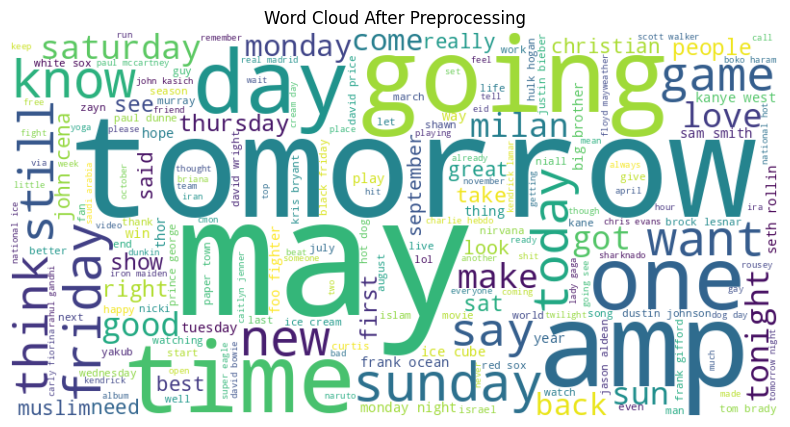

In [28]:
# Ensure tokens column exists
df['tokens'] = df['Text'].apply(clean_text)

# Flatten and join tokens into a single string
cleaned_text = ' '.join([' '.join(tokens) for tokens in df['tokens'].dropna()])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Preprocessing')
plt.show()

Top N Frequent Words

<ipython-input-29-dc96847ef6a6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="Blues_r")


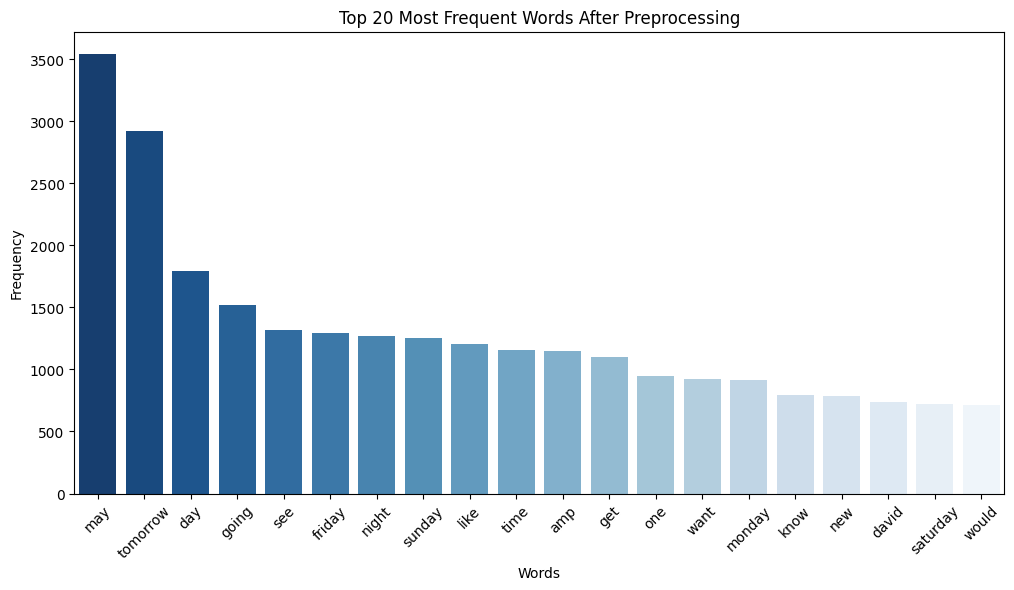

In [29]:
# Flatten tokenized words and count occurrences
word_counts = Counter([word for tokens in df['tokens'] for word in tokens])

# Select top N words
top_words = dict(word_counts.most_common(20))  # Top 20 words

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words After Preprocessing")
plt.show()

Top Bi-grams

<ipython-input-30-2ad606f36e52>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in top_bigrams], y=[x[1] for x in top_bigrams], palette="Blues_r")


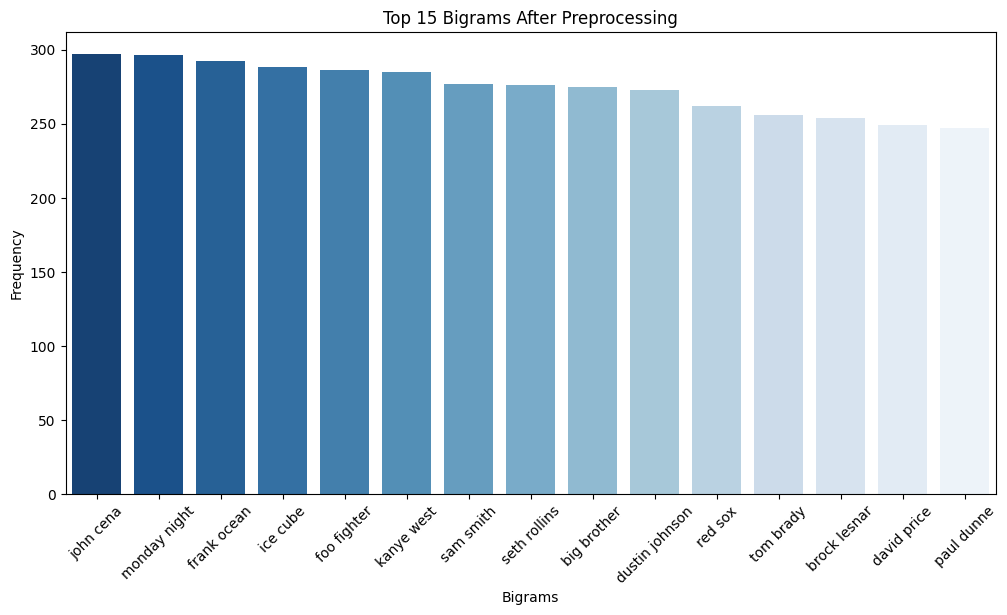

In [30]:
# Function to get top N-grams
def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    sum_words = ngrams.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bigrams
top_bigrams = get_top_ngrams(df['tokens'].apply(lambda x: ' '.join(x)), ngram_range=(2,2), n=15)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=[x[0] for x in top_bigrams], y=[x[1] for x in top_bigrams], palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 15 Bigrams After Preprocessing")
plt.show()

<ipython-input-31-1e8018389667>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf_words, y=top_tfidf_scores, palette="Blues_r")


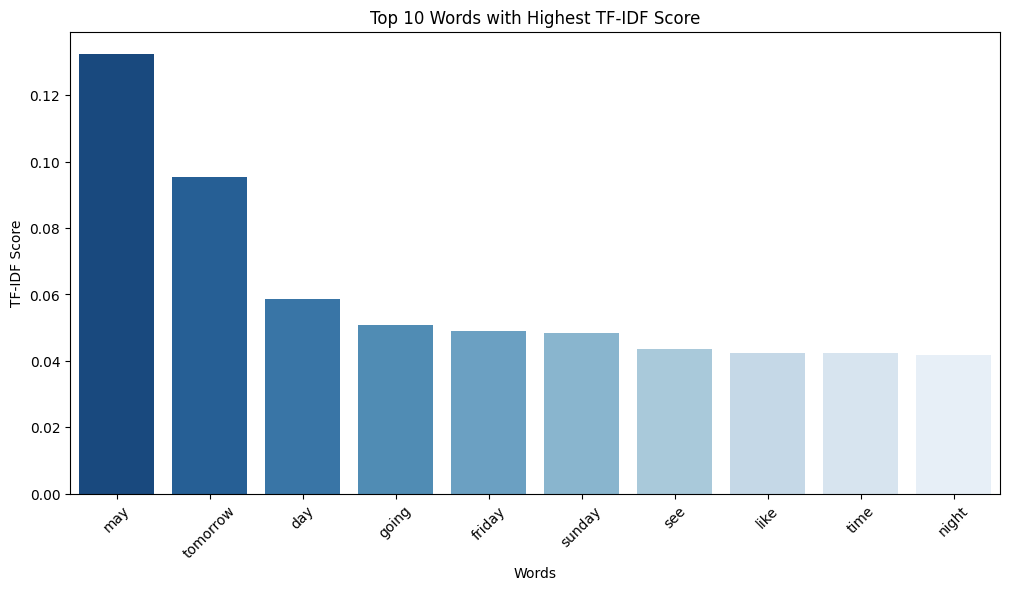

In [31]:
# Compute TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(max_features=20)  # Limit to top 20 words

# Join the tokens back into strings before applying TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))

feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

# Sort and select top words
sorted_indices = np.argsort(scores)[::-1]
top_tfidf_words = [feature_names[i] for i in sorted_indices[:10]]
top_tfidf_scores = [scores[i] for i in sorted_indices[:10]]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_tfidf_words, y=top_tfidf_scores, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top 10 Words with Highest TF-IDF Score")
plt.show()

In [32]:
df


,Sentiment,Text,Labels,tokens
0,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",2,"[picturehouses, pink, floyds, roger, water, wa..."
1,neutral,Order Go Set a Watchman in store or through ou...,2,"[order, set, watchman, store, website, tuesday..."
2,negative,If these runway renovations at the airport pre...,0,"[runway, renovation, airport, prevent, seeing,..."
3,neutral,If you could ask an onstage interview question...,2,"[could, ask, onstage, interview, question, mis..."
4,positive,A portion of book sales from our Harper Lee/Go...,1,"[portion, book, sale, harper, leego, set, watc..."
...,...,...,...,...
20627,neutral,@ShaquilleHoNeal from what I think you're aski...,2,"[think, asking, order, future, drake, thug, co..."
20628,positive,"Iran ranks 1st in liver surgeries, Allah bless...",1,"[iran, rank, liver, surgery, allah, bless, cou..."
20629,neutral,Hours before he arrived in Saudi Arabia on Tue...,2,"[hour, arrived, saudi, arabia, tuesday, turkis..."
20630,negative,@VanityFair Alex Kim Kardashian worth how to ...,0,"[alex, kim, kardashian, worth, love, kim, kard..."


In [33]:
# Assigning Values to the Dependent and Independent Variables
X = df['tokens'].apply(lambda x: x if isinstance(x, list) else word_tokenize(x))  # confirm that X contains actual token lists not strings
y = df['Labels']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust feature count if needed

X = vectorizer.fit_transform(df["tokens"].apply(' '.join)) # Join the tokens back into strings using ' '.join
y = df["Labels"]  # Ensure this is your target variable

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

trained_models = {}  # Dictionary to store trained models

Training Logistic Regression...

Logistic Regression - Accuracy: 0.6533
              precision    recall  f1-score   support

           0       0.60      0.29      0.39       634
           1       0.69      0.59      0.63      1392
           2       0.64      0.81      0.72      2090

    accuracy                           0.65      4116
   macro avg       0.64      0.56      0.58      4116
weighted avg       0.65      0.65      0.64      4116



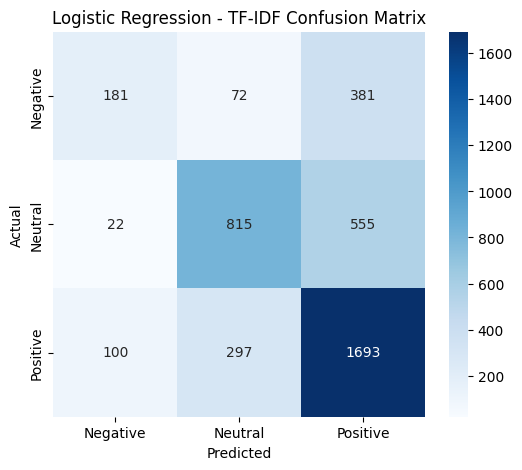

Training SVM...

SVM - Accuracy: 0.6487
              precision    recall  f1-score   support

           0       0.65      0.20      0.30       634
           1       0.73      0.53      0.61      1392
           2       0.62      0.87      0.72      2090

    accuracy                           0.65      4116
   macro avg       0.67      0.53      0.55      4116
weighted avg       0.66      0.65      0.62      4116



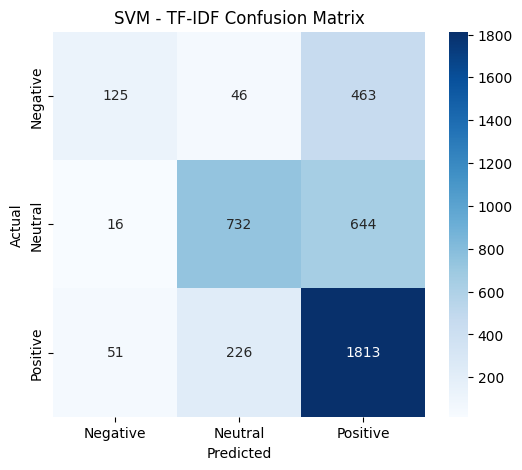

Training Random Forest...

Random Forest - Accuracy: 0.6397
              precision    recall  f1-score   support

           0       0.62      0.23      0.33       634
           1       0.68      0.54      0.60      1392
           2       0.62      0.83      0.71      2090

    accuracy                           0.64      4116
   macro avg       0.64      0.53      0.55      4116
weighted avg       0.64      0.64      0.62      4116



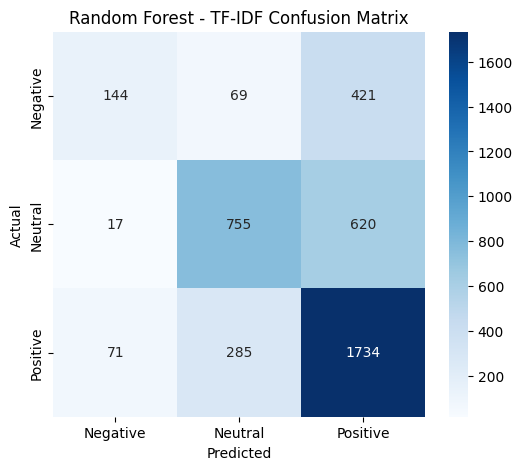

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:27:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 0.6341
              precision    recall  f1-score   support

           0       0.60      0.24      0.34       634
           1       0.70      0.49      0.58      1392
           2       0.62      0.85      0.71      2090

    accuracy                           0.63      4116
   macro avg       0.64      0.53      0.54      4116
weighted avg       0.64      0.63      0.61      4116



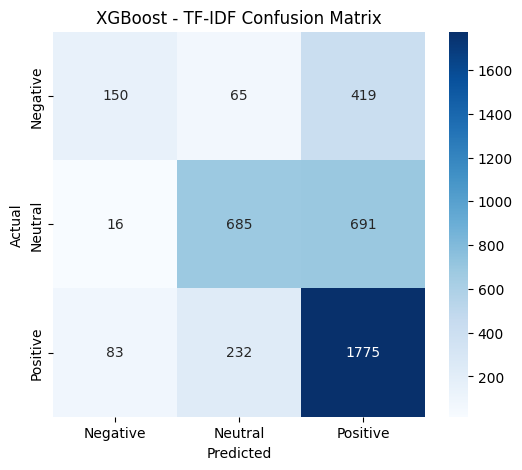

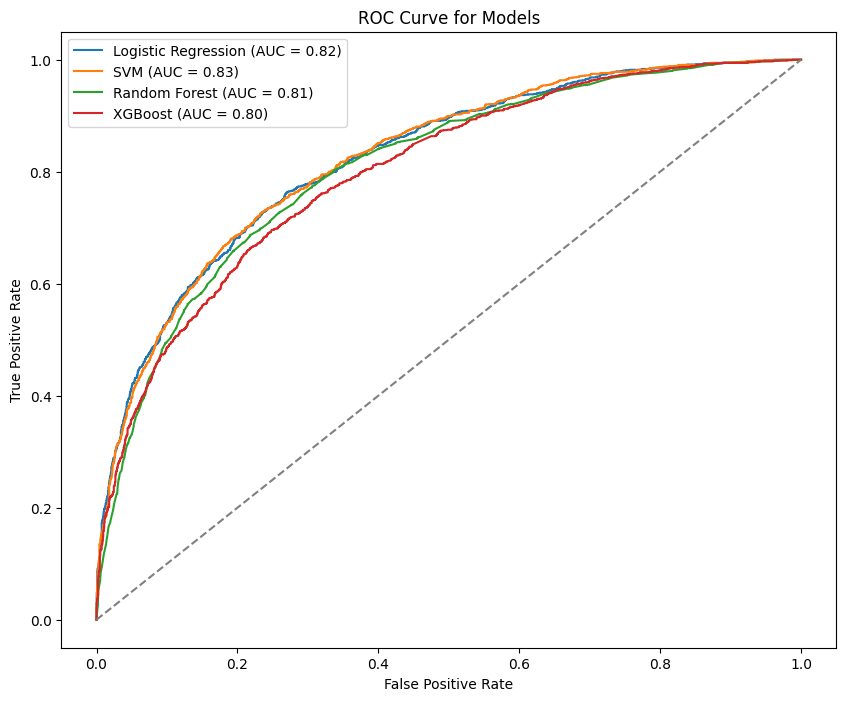

In [36]:
# Train & Evaluate Models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Check if model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probability for class 1
    else:
        y_prob = model.decision_function(X_test_tfidf)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Define the labels
    labels = ["Negative", "Neutral", "Positive",]

    # Confusion Matrix
    plt.figure(figsize=(6, 5))  # New figure for each confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels= labels,
                yticklabels= labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - TF-IDF Confusion Matrix")
    plt.show()

# ROC Curve Plot
plt.figure(figsize=(10, 8))  # Single figure for ROC Curve
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        continue  # Skip models that don't support ROC

    fpr, tpr, _ = roc_curve((y_test == 1).astype(int), y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Models (TF-IDF)")
plt.legend()
plt.show()

# Word2Vec Predictions

In [37]:
# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=X_train.tolist(),  # Train only on training data
    vector_size=100,
    window=5,
    min_count=2,  # Filter rare words (better than min_count=1)
    workers=4,
    sg=0, # Indicate the selection for CBOW
    epochs=10  # Explicit epochs parameter
)

In [38]:
# Function to get average Word2Vec embeddings
def get_w2v_vectors(text, model, vector_size=100):
    words = [word for word in text if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    return np.zeros(vector_size)

In [39]:
# Convert text to embeddings
X_train_w2v = np.array([get_w2v_vectors(text, w2v_model) for text in X_train])
X_test_w2v = np.array([get_w2v_vectors(text, w2v_model) for text in X_test])

In [40]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

trained_models = {}  # Dictionary to store trained models

Training Logistic Regression...

Logistic Regression - Accuracy: 0.5756
              precision    recall  f1-score   support

           0       0.43      0.12      0.19       634
           1       0.59      0.46      0.52      1392
           2       0.58      0.79      0.67      2090

    accuracy                           0.58      4116
   macro avg       0.53      0.46      0.46      4116
weighted avg       0.56      0.58      0.54      4116



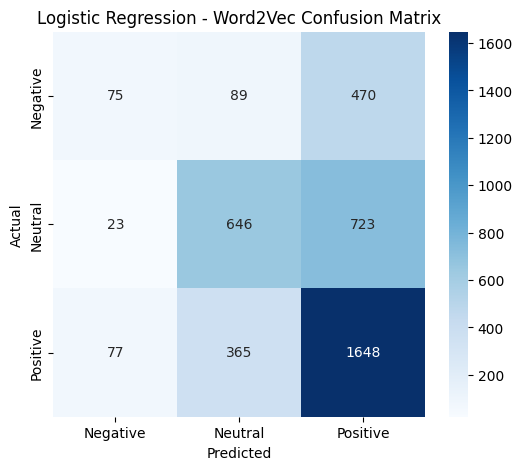

Training SVM...

SVM - Accuracy: 0.5770
              precision    recall  f1-score   support

           0       0.60      0.03      0.06       634
           1       0.62      0.40      0.48      1392
           2       0.56      0.86      0.68      2090

    accuracy                           0.58      4116
   macro avg       0.60      0.43      0.41      4116
weighted avg       0.59      0.58      0.52      4116



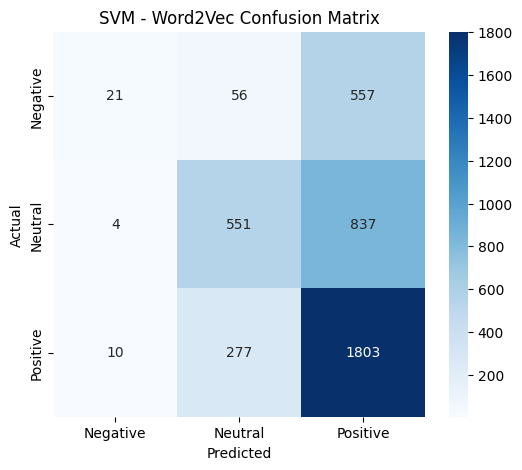

Training Random Forest...

Random Forest - Accuracy: 0.5748
              precision    recall  f1-score   support

           0       0.52      0.17      0.26       634
           1       0.57      0.49      0.52      1392
           2       0.58      0.76      0.66      2090

    accuracy                           0.57      4116
   macro avg       0.56      0.47      0.48      4116
weighted avg       0.57      0.57      0.55      4116



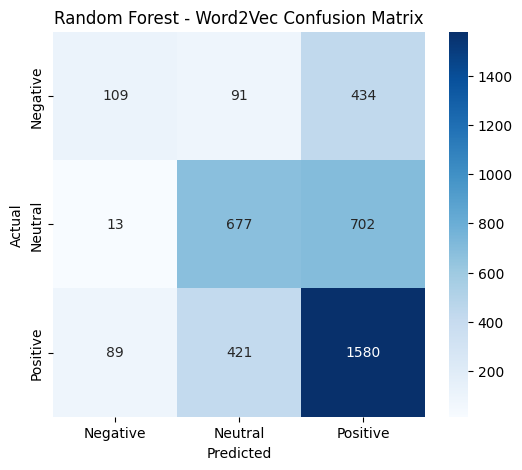

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 0.5646
              precision    recall  f1-score   support

           0       0.43      0.20      0.27       634
           1       0.56      0.50      0.53      1392
           2       0.58      0.72      0.64      2090

    accuracy                           0.56      4116
   macro avg       0.52      0.47      0.48      4116
weighted avg       0.55      0.56      0.55      4116



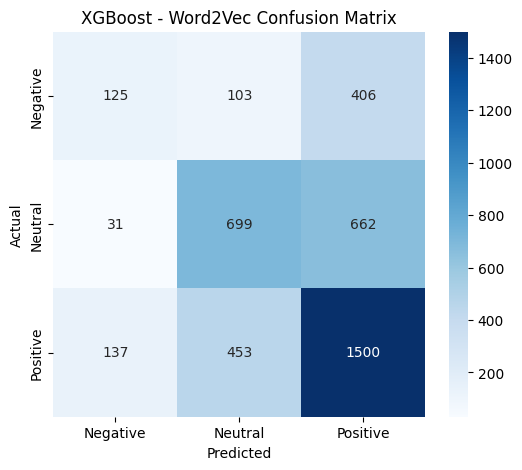

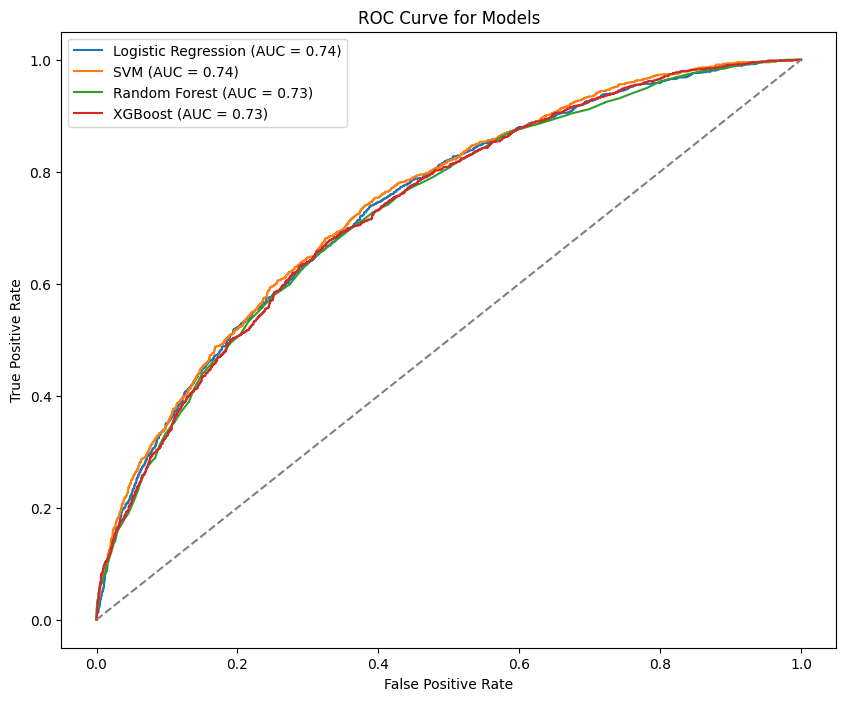

In [41]:
# Train & Evaluate Models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_w2v, y_train)
    y_pred = model.predict(X_test_w2v)

    # Check if model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_w2v)[:, 1]  # Probability for class 1
    else:
        y_prob = model.decision_function(X_test_w2v)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Define the labels
    labels = sorted(y.unique().tolist())  # Dynamic label handling
    label_names = ["Negative", "Neutral", "Positive"]  # Ensure matches actual labels

    # Update confusion matrix creation
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=label_names,
           yticklabels=label_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Word2Vec Confusion Matrix")
    plt.show()

# ROC Curve Plot
plt.figure(figsize=(10, 8))  # Single figure for ROC Curve
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_w2v)[:, 1]
    else:
        continue  # Skip models that don't support ROC

    fpr, tpr, _ = roc_curve((y_test == 1).astype(int), y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Models (Word2Vec)")
plt.legend()
plt.show()

# Hybrid Embedding

In [42]:
# Combine Word2Vec + TF-IDF features
X_train_combined = hstack([X_train_tfidf, X_train_w2v])
X_test_combined = hstack([X_test_tfidf, X_test_w2v])

In [43]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

trained_models = {}  # Dictionary to store trained models

Training Logistic Regression...

Logistic Regression - Accuracy: 0.6521
              precision    recall  f1-score   support

           0       0.61      0.31      0.41       634
           1       0.68      0.59      0.63      1392
           2       0.65      0.80      0.71      2090

    accuracy                           0.65      4116
   macro avg       0.64      0.57      0.58      4116
weighted avg       0.65      0.65      0.64      4116



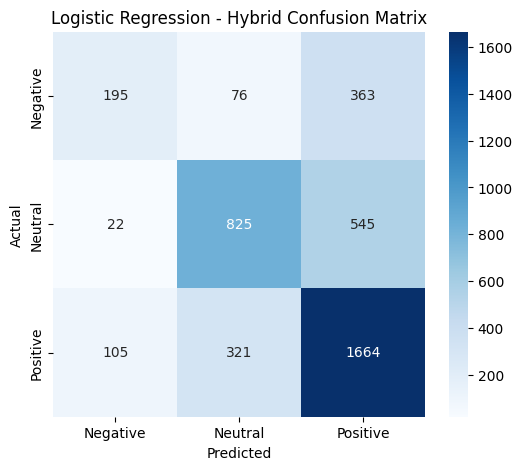

Training SVM...

SVM - Accuracy: 0.5979
              precision    recall  f1-score   support

           0       0.57      0.08      0.14       634
           1       0.67      0.43      0.52      1392
           2       0.58      0.87      0.69      2090

    accuracy                           0.60      4116
   macro avg       0.61      0.46      0.45      4116
weighted avg       0.61      0.60      0.55      4116



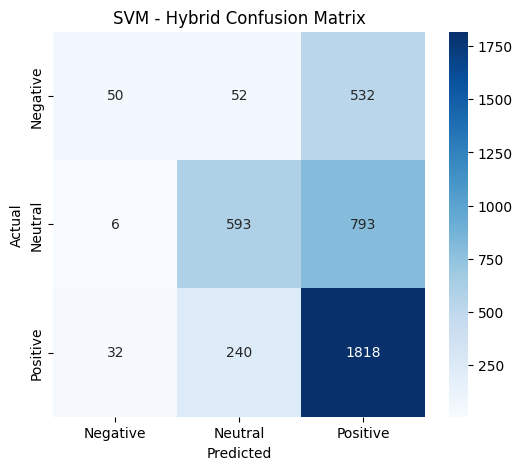

Training Random Forest...

Random Forest - Accuracy: 0.5809
              precision    recall  f1-score   support

           0       0.51      0.14      0.22       634
           1       0.59      0.50      0.54      1392
           2       0.58      0.77      0.66      2090

    accuracy                           0.58      4116
   macro avg       0.56      0.47      0.48      4116
weighted avg       0.57      0.58      0.55      4116



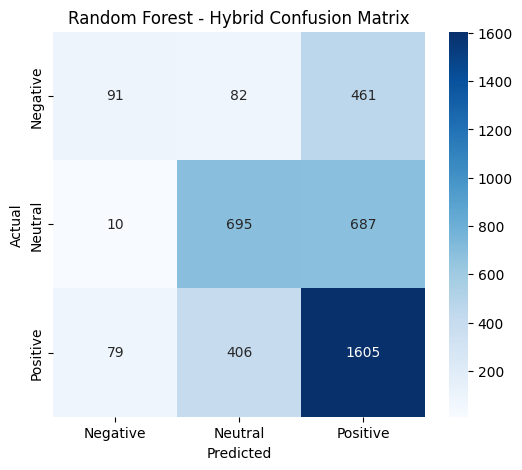

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 0.6363
              precision    recall  f1-score   support

           0       0.62      0.26      0.37       634
           1       0.68      0.52      0.59      1392
           2       0.62      0.83      0.71      2090

    accuracy                           0.64      4116
   macro avg       0.64      0.54      0.56      4116
weighted avg       0.64      0.64      0.62      4116



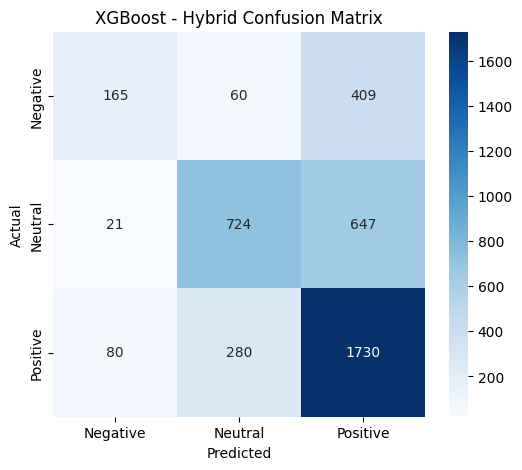

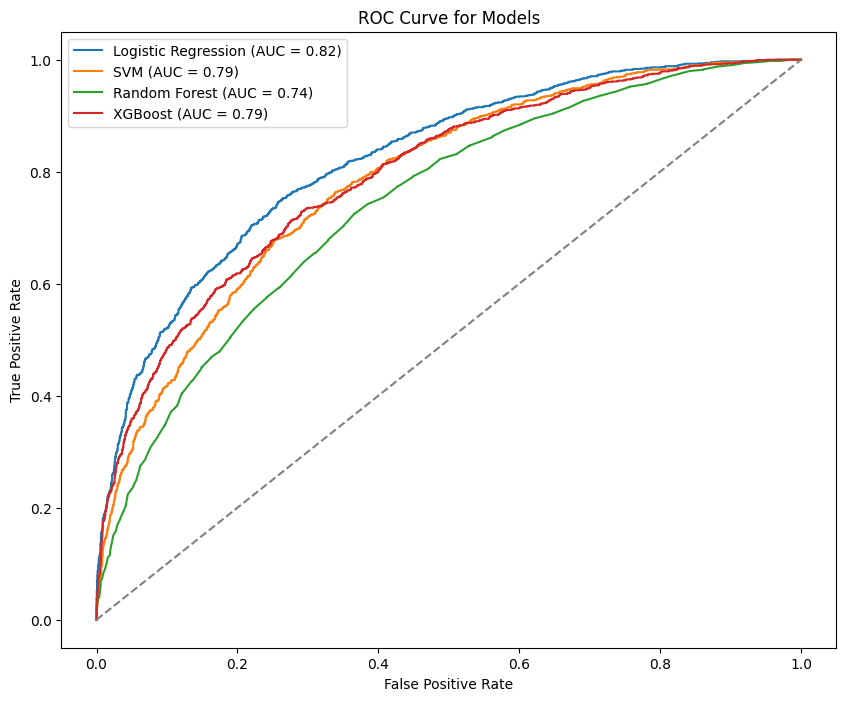

In [44]:
# Train & Evaluate Models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)

    # Check if model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_combined)[:, 1]  # Probability for class 1
    else:
        y_prob = model.decision_function(X_test_combined)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Define the labels
    labels = ["Negative", "Neutral", "Positive",]

    # Confusion Matrix
    plt.figure(figsize=(6, 5))  # New figure for each confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                      xticklabels= labels,
                yticklabels= labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Hybrid Confusion Matrix")
    plt.show()

# ROC Curve Plot
plt.figure(figsize=(10, 8))  # Single figure for ROC Curve
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_combined)[:, 1]
    else:
        continue  # Skip models that don't support ROC

    fpr, tpr, _ = roc_curve((y_test == 1).astype(int), y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Models (HYBRID)")
plt.legend()
plt.show()